# 📐 矩阵微分与梯度计算

## 🎯 学习目标

本教程将帮助你掌握神经网络训练中最核心的数学工具——**矩阵微分**。这是理解反向传播算法的必备基础。

**学完本教程你将能够：**

1. ✅ 理解标量、向量、矩阵之间的各种导数形式
2. ✅ 掌握神经网络中关键的梯度计算：$\frac{\partial L}{\partial W}$ 和 $\frac{\partial L}{\partial b}$
3. ✅ 理解链式法则的矩阵形式
4. ✅ 使用数值梯度检验验证梯度计算的正确性
5. ✅ 实现简单神经网络层的完整梯度计算

---

## 📚 先修知识

- 线性代数基础（矩阵乘法、转置）→ `01_linear_algebra.ipynb`
- 微积分基础（导数、链式法则）→ `02_calculus.ipynb`

---

## 📖 目录

1. **基础矩阵导数**
   - 标量对向量的导数
   - 标量对矩阵的导数
   - 向量对向量的导数（Jacobian 矩阵）
   - 常用矩阵求导规则

2. **神经网络中的梯度计算**
   - 损失函数对权重的梯度：$\frac{\partial L}{\partial W}$
   - 损失函数对偏置的梯度：$\frac{\partial L}{\partial b}$
   - 链式法则的矩阵形式
   - 向量化批量梯度计算

3. **实践应用**
   - 线性层梯度的从零实现
   - 激活函数的导数计算
   - 数值梯度检验（Gradient Checking）
   - 完整示例：单层网络的梯度计算

**预计学习时间：** 3-4 小时

---

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子以确保可复现性
np.random.seed(42)

# 设置打印精度
np.set_printoptions(precision=4, suppress=True)

print("✅ 环境配置完成！")
print(f"NumPy 版本: {np.__version__}")

✅ 环境配置完成！
NumPy 版本: 1.24.3


---

# 📖 数学符号速查表

> **💡 重要提示**：如果在学习过程中遇到不认识的符号，请随时回到这里查阅！

## 🔤 基础符号

| 符号 | 读音 | 含义 | 示例 |
|------|------|------|------|
| $\mathbb{R}$ | "R"（实数集） | 实数集合 | $x \in \mathbb{R}$ 表示 x 是一个实数 |
| $\mathbb{R}^n$ | "R的n次方" | n维实数空间（n维向量） | $\mathbf{x} \in \mathbb{R}^3$ 表示 x 是3维向量 |
| $\mathbb{R}^{m \times n}$ | "R的m乘n" | m行n列的矩阵 | $W \in \mathbb{R}^{2 \times 3}$ 表示W是2×3矩阵 |
| $\in$ | "属于" | 元素属于集合 | $x \in \mathbb{R}$ |
| $\to$ | "映射到" | 函数的输入输出类型 | $f: \mathbb{R}^n \to \mathbb{R}$ 表示函数输入n维向量，输出标量 |

---

## 📐 向量与矩阵符号

| 符号 | 读音 | 含义 | 示例 |
|------|------|------|------|
| $\mathbf{x}$ | "向量x"（粗体小写） | 列向量 | $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$ |
| $W$ | "矩阵W"（大写） | 矩阵 | $W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix}$ |
| $\mathbf{x}^T$ | "x转置" | 向量/矩阵的转置 | 将列向量变成行向量 |
| $\|\mathbf{x}\|$ | "x的范数" | 向量的长度/大小 | $\|\mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + \cdots}$ |
| $\|\mathbf{x}\|^2$ | "x的范数平方" | 向量长度的平方 | $\|\mathbf{x}\|^2 = x_1^2 + x_2^2 + \cdots$ |
| $\mathbf{x}^T \mathbf{y}$ | "x转置乘y" | 向量内积（点积） | $\mathbf{x}^T \mathbf{y} = x_1 y_1 + x_2 y_2 + \cdots$ |
| $\mathbf{x} \mathbf{y}^T$ | "x乘y转置" | 外积，结果是矩阵 | $\mathbf{x} \mathbf{y}^T \in \mathbb{R}^{m \times n}$ |
| $W \mathbf{x}$ | "W乘x" | 矩阵-向量乘法 | 结果是向量 |

---

## 🧮 微分符号

| 符号 | 读音 | 含义 | 说明 |
|------|------|------|------|
| $\frac{dy}{dx}$ | "dy dx" 或 "y对x的导数" | 普通导数 | 一元函数的导数 |
| $\frac{\partial f}{\partial x}$ | "偏f 偏x" 或 "f对x的偏导数" | 偏导数 | 多元函数对某个变量的导数 |
| $\nabla f$ | "nabla f" 或 "梯度f" | 梯度（向量） | $\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$ |
| $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$ | "偏y 偏x" | Jacobian矩阵 | 向量对向量的导数（矩阵形式） |
| $\frac{\partial L}{\partial W}$ | "偏L 偏W" | 标量对矩阵的导数 | 神经网络中最常见的梯度 |

---

## 🔢 常见希腊字母

| 符号 | 读音 | 常见用途 |
|------|------|----------|
| $\delta$ | "delta"（德尔塔） | 误差、小量变化 |
| $\Delta$ | "大delta" | 误差矩阵、大变化量 |
| $\epsilon$ | "epsilon"（艾普西龙） | 极小的正数（如 $10^{-7}$） |
| $\sigma$ | "sigma"（西格玛） | 激活函数（如sigmoid）、标准差 |
| $\theta$ | "theta"（西塔） | 参数（通用） |
| $\lambda$ | "lambda"（兰姆达） | 正则化系数 |
| $\alpha$ | "alpha"（阿尔法） | 学习率 |

---

## ➗ 运算符号

| ���号 | 读音 | 含义 | 示例 |
|------|------|------|------|
| $\sum$ | "求和" | 对一系列数求和 | $\sum_{i=1}^{n} x_i = x_1 + x_2 + \cdots + x_n$ |
| $\prod$ | "求积" | 对一系列数求乘积 | $\prod_{i=1}^{n} x_i = x_1 \times x_2 \times \cdots \times x_n$ |
| $\odot$ | "哈达玛积" | 逐元素乘法（矩阵对应元素相乘） | $[1,2] \odot [3,4] = [1 \times 3, 2 \times 4] = [3,8]$ |
| $@$ | "at" | 矩阵乘法（NumPy） | `A @ B` 等同于 `np.dot(A, B)` |
| $\approx$ | "约等于" | 近似等于 | $\frac{f(x+h) - f(x)}{h} \approx f'(x)$ |

---

## 🎯 特殊函数

| 符号 | 读音 | 含义 |
|------|------|------|
| $\text{tr}(A)$ | "trace A" 或 "迹A" | 矩阵对角元素之和：$\sum_{i} A_{ii}$ |
| $\text{diag}(a_1, a_2, \ldots)$ | "对角矩阵" | 对角线是 $a_1, a_2, \ldots$，其余为0的矩阵 |
| $\exp(x)$ | "e的x次方" | 指数函数：$e^x$ |
| $\ln(x)$ | "自然对数x" | 自然对数（以e为底） |

---

## 📦 其他符号

| 符号 | 含义 | 说明 |
|------|------|------|
| $\boxed{公式}$ | 重要公式 | 用方框标注的公式通常是核心、需要记住的 |
| $\Rightarrow$ | 推导出、因此 | 逻辑推导符号 |
| $\iff$ | 当且仅当 | 等价关系 |
| $:=$ | 定义为 | $x := y$ 表示定义x等于y |

---

## 📌 神经网络专用符号

| 符号 | 含义 | 说明 |
|------|------|------|
| $L$ | 损失函数（Loss） | 标量，衡量预测与真实值的差距 |
| $W^{(l)}$ | 第l层的权重矩阵 | 上标$(l)$表示层号 |
| $\mathbf{b}^{(l)}$ | 第l层的偏置向量 | 每层都有自己的偏置 |
| $\mathbf{z}^{(l)}$ | 第l层的线性输出 | $\mathbf{z}^{(l)} = W^{(l)} \mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}$ |
| $\mathbf{a}^{(l)}$ | 第l层的激活值 | $\mathbf{a}^{(l)} = \sigma(\mathbf{z}^{(l)})$ |
| $\delta^{(l)}$ | 第l层的误差 | $\delta^{(l)} = \frac{\partial L}{\partial \mathbf{z}^{(l)}}$ |
| $B$ | Batch size | 一批数据的样本数量 |

---

## 💡 形状标注说明

在代码注释中，我们会标注数组/矩阵的形状，例如：

```python
# x: (n,) 表示 x 是长度为 n 的一维数组（向量）
# W: (m, n) 表示 W 是 m 行 n 列的二维数组（矩阵）
# X: (B, n) 表示 X 是 B 个样本，每个样本 n 维（批量数据）
```

**形状约定：**
- 单个数字：一维数组（向量）
- 两个数字：二维数组（矩阵）
- 第一个维度通常是样本数（batch size）

---

## 🔍 如何读懂数学公式？

**示例公式：** $\frac{\partial L}{\partial W} = \delta \mathbf{x}^T$

**逐步解读：**
1. **左边：** $\frac{\partial L}{\partial W}$
   - 读作："偏L偏W" 或 "L对W的偏导数"
   - 含义：损失函数 L 对权重矩阵 W 的梯度

2. **右边：** $\delta \mathbf{x}^T$
   - $\delta$：误差向量（列向量）
   - $\mathbf{x}^T$：输入向量的转置（行向量）
   - $\delta \mathbf{x}^T$：列向量×行向量 = 矩阵（外积）

3. **整体含义：** 权重的梯度等于误差向量和输入向量的外积

---

**💡 小贴士：**
- 不熟悉的符号可以先跳过，继续往下看代码示例
- 看到代码实现后再回来理解符号，会更容易
- 本教程所有公式都配有详细的代码实现和注释

---

# 1️⃣ 基础矩阵导数

## 1.2 标量对向量的导数（梯度）

### 📖 定义

设函数 $f: \mathbb{R}^n \to \mathbb{R}$，输入向量 $\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$，则：

$$
\nabla f(\mathbf{x}) = \frac{\partial f}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^n
$$

这个向量称为 **梯度（Gradient）**。

### 🔍 几何意义

- 梯度方向是函数值增长最快的方向
- 梯度的模长表示增长的速率
- 负梯度方向是函数值下降最快的方向（梯度下降法的基础）

---

### 💡 示例 1：二次型函数

$$
f(\mathbf{x}) = \mathbf{x}^T \mathbf{x} = x_1^2 + x_2^2 + \cdots + x_n^2
$$

**求梯度：**

$$
\frac{\partial f}{\partial x_i} = 2x_i \quad \Rightarrow \quad \nabla f = 2\mathbf{x}
$$

In [3]:
# 示例：计算 f(x) = x^T x 的梯度

def f_quadratic(x):
    """
    二次型函数: f(x) = x^T @ x = ||x||^2
    
    参数:
    -----
    x : ndarray, shape (n,)
        输入向量
    
    返回:
    -----
    f : float
        函数值（标量）
    """
    return np.dot(x, x)

def gradient_quadratic(x):
    """
    二次型函数的梯度: ∇f = 2x
    
    推导:
    f = x1^2 + x2^2 + ... + xn^2
    ∂f/∂xi = 2*xi
    因此 ∇f = 2x
    
    参数:
    -----
    x : ndarray, shape (n,)
        输入向量
    
    返回:
    -----
    grad : ndarray, shape (n,)
        梯度向量
    """
    return 2 * x

# 测试
x = np.array([1.0, 2.0, 3.0])
print("输入向量 x =", x)
print("函数值 f(x) =", f_quadratic(x))
print("梯度 ∇f(x) =", gradient_quadratic(x))
print("\n验证: x^T x = 1^2 + 2^2 + 3^2 =", 1**2 + 2**2 + 3**2)

输入向量 x = [1. 2. 3.]
函数值 f(x) = 14.0
梯度 ∇f(x) = [2. 4. 6.]

验证: x^T x = 1^2 + 2^2 + 3^2 = 14


### 📊 可视化：梯度的几何意义

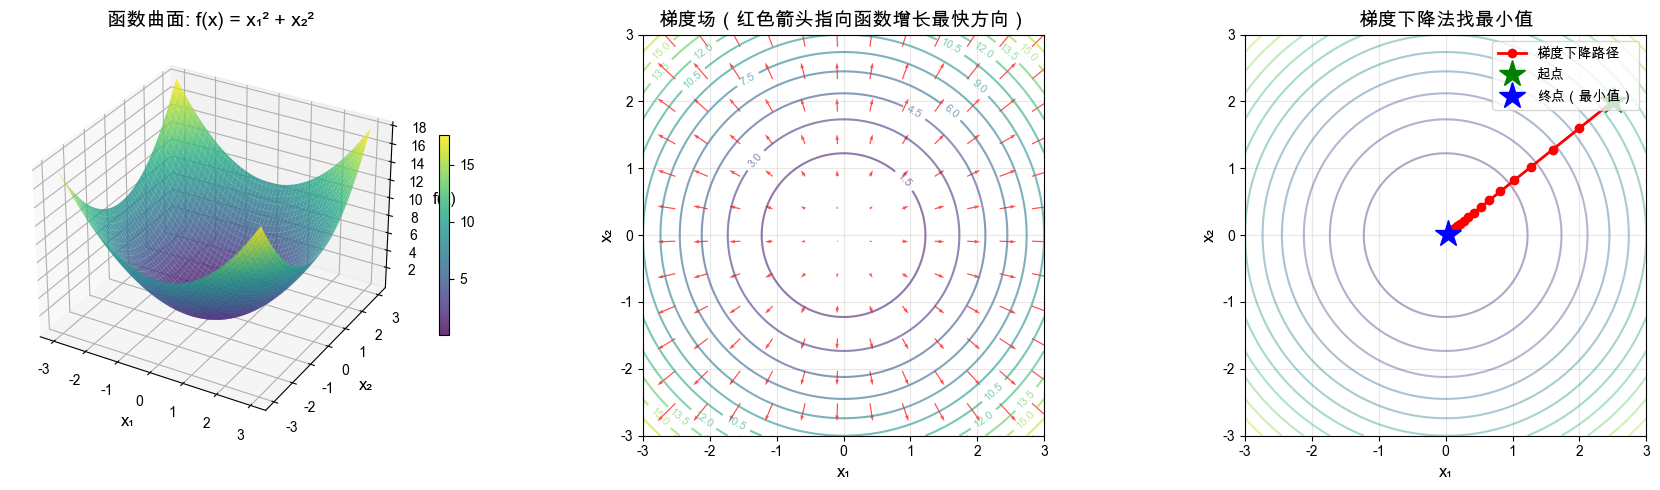

起点: [2.5 2. ]
终点: [0.0288 0.0231]
理论最小值点: [0, 0]


In [2]:
# 可视化二维情况下的梯度方向

# 创建网格
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# 计算函数值 f(x1, x2) = x1^2 + x2^2
Z = X1**2 + X2**2

# 计算梯度场（每个点的梯度方向）
# ∇f = [2*x1, 2*x2]
U = 2 * X1  # ∂f/∂x1
V = 2 * X2  # ∂f/∂x2

# 创建图形
fig = plt.figure(figsize=(18, 5))

# 左图：3D 曲面
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.8, edgecolor='none')
ax1.set_xlabel('x₁', fontsize=12)
ax1.set_ylabel('x₂', fontsize=12)
ax1.set_zlabel('f(x)', fontsize=12)
ax1.set_title('函数曲面: f(x) = x₁² + x₂²', fontsize=14, fontweight='bold')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# 中图：等高线图 + 梯度场
ax2 = fig.add_subplot(132)
contour = ax2.contour(X1, X2, Z, levels=15, cmap='viridis', alpha=0.6)
ax2.clabel(contour, inline=True, fontsize=8)

# 绘制梯度场（每隔一段距离绘制一个箭头）
step = 8
ax2.quiver(X1[::step, ::step], X2[::step, ::step], 
           U[::step, ::step], V[::step, ::step],
           color='red', alpha=0.7, width=0.003)

ax2.set_xlabel('x₁', fontsize=12)
ax2.set_ylabel('x₂', fontsize=12)
ax2.set_title('梯度场（红色箭头指向函数增长最快方向）', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

# 右图：梯度下降路径
ax3 = fig.add_subplot(133)
ax3.contour(X1, X2, Z, levels=15, cmap='viridis', alpha=0.4)

# 模拟梯度下降
x_start = np.array([2.5, 2.0])  # 起始点
learning_rate = 0.1
n_steps = 20

trajectory = [x_start]
x_current = x_start.copy()

for i in range(n_steps):
    # 计算梯度
    grad = 2 * x_current
    # 沿负梯度方向更新
    x_current = x_current - learning_rate * grad
    trajectory.append(x_current.copy())

trajectory = np.array(trajectory)

# 绘制路径
ax3.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', linewidth=2, markersize=6, label='梯度下降路径')
ax3.plot(trajectory[0, 0], trajectory[0, 1], 'g*', markersize=20, label='起点')
ax3.plot(trajectory[-1, 0], trajectory[-1, 1], 'b*', markersize=20, label='终点（最小值）')

ax3.set_xlabel('x₁', fontsize=12)
ax3.set_ylabel('x₂', fontsize=12)
ax3.set_title('梯度下降法找最小值', fontsize=14, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"起点: {trajectory[0]}")
print(f"终点: {trajectory[-1]}")
print(f"理论最小值点: [0, 0]")

### 💡 示例 2：线性函数

$$
f(\mathbf{x}) = \mathbf{a}^T \mathbf{x} = a_1 x_1 + a_2 x_2 + \cdots + a_n x_n
$$

**求梯度：**

$$
\frac{\partial f}{\partial x_i} = a_i \quad \Rightarrow \quad \nabla f = \mathbf{a}
$$

**重要结论：** 线性函数的梯度是常数向量！

In [4]:
# 示例：计算 f(x) = a^T x 的梯度

def f_linear(x, a):
    """
    线性函数: f(x) = a^T @ x
    
    参数:
    -----
    x : ndarray, shape (n,)
        输入向量
    a : ndarray, shape (n,)
        系数向量
    
    返回:
    -----
    f : float
        函数值
    """
    return np.dot(a, x)

def gradient_linear(x, a):
    """
    线性函数的梯度: ∇f = a
    
    推导:
    f = a1*x1 + a2*x2 + ... + an*xn
    ∂f/∂xi = ai
    因此 ∇f = a （与 x 无关！）
    
    注意: 线性函数的梯度是常数向量
    """
    return a

# 测试
a = np.array([2.0, -1.0, 3.0])
x = np.array([1.0, 2.0, 3.0])

print("系数向量 a =", a)
print("输入向量 x =", x)
print("函数值 f(x) =", f_linear(x, a))
print("梯度 ∇f(x) =", gradient_linear(x, a))
print("\n注意: 梯度等于 a，与 x 的值无关！")

系数向量 a = [ 2. -1.  3.]
输入向量 x = [1. 2. 3.]
函数值 f(x) = 9.0
梯度 ∇f(x) = [ 2. -1.  3.]

注意: 梯度等于 a，与 x 的值无关！


---

## 1.3 标量对矩阵的导数

### 📖 定义

设函数 $f: \mathbb{R}^{m \times n} \to \mathbb{R}$，输入矩阵 $W \in \mathbb{R}^{m \times n}$，则：

$$
\frac{\partial f}{\partial W} = \begin{bmatrix}
\frac{\partial f}{\partial W_{11}} & \frac{\partial f}{\partial W_{12}} & \cdots & \frac{\partial f}{\partial W_{1n}} \\
\frac{\partial f}{\partial W_{21}} & \frac{\partial f}{\partial W_{22}} & \cdots & \frac{\partial f}{\partial W_{2n}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f}{\partial W_{m1}} & \frac{\partial f}{\partial W_{m2}} & \cdots & \frac{\partial f}{\partial W_{mn}}
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

**关键：** 导数矩阵的形状与原矩阵 $W$ 相同！

---

### 💡 示例：神经网络中的线性层

$$
\mathbf{z} = W\mathbf{x} + \mathbf{b}
$$

其中：
- $W \in \mathbb{R}^{m \times n}$ 是权重矩阵
- $\mathbf{x} \in \mathbb{R}^n$ 是输入向量
- $\mathbf{b} \in \mathbb{R}^m$ 是偏置向量
- $\mathbf{z} \in \mathbb{R}^m$ 是输出向量

假设损失函数 $L$ 是标量，我们需要计算：

$$
\frac{\partial L}{\partial W} \in \mathbb{R}^{m \times n}
$$

---

## 1.4 常用矩阵求导规则速查表

| 函数 $f$ | 导数 $\frac{\partial f}{\partial \mathbf{x}}$ 或 $\frac{\partial f}{\partial W}$ | 说明 |
|----------|------------------------------------------------------------------------------|------|
| $\mathbf{a}^T \mathbf{x}$ | $\mathbf{a}$ | 线性函数 |
| $\mathbf{x}^T \mathbf{x}$ | $2\mathbf{x}$ | 二次型 |
| $\mathbf{x}^T A \mathbf{x}$ | $(A + A^T)\mathbf{x}$ | 一般二次型 |
| $\|\mathbf{x}\|^2$ | $2\mathbf{x}$ | 向量范数平方 |
| $\text{tr}(AB)$ | $B^T$ | 迹的导数 ($\frac{\partial}{\partial A}$) |
| $\mathbf{a}^T W \mathbf{b}$ | $\mathbf{a} \mathbf{b}^T$ | **神经网络核心公式** |

### 🔥 最重要的公式（神经网络）

$$
\boxed{\frac{\partial (\mathbf{a}^T W \mathbf{b})}{\partial W} = \mathbf{a} \mathbf{b}^T}
$$

这个公式是反向传播算法的核心！

**形状验证：**
- $\mathbf{a} \in \mathbb{R}^m$，$\mathbf{b} \in \mathbb{R}^n$
- $W \in \mathbb{R}^{m \times n}$
- $\mathbf{a} \mathbf{b}^T \in \mathbb{R}^{m \times n}$ ✅ 形状匹配！

---

In [5]:
# 验证核心公式: ∂(a^T W b) / ∂W = a b^T

# 定义向量和矩阵
m, n = 3, 4
a = np.random.randn(m)      # shape: (3,)
b = np.random.randn(n)      # shape: (4,)
W = np.random.randn(m, n)   # shape: (3, 4)

# 计算函数值: f = a^T W b
# 步骤:
# 1. W @ b -> (3, 4) @ (4,) = (3,)  [矩阵-向量乘法]
# 2. a^T @ (W @ b) -> (3,) @ (3,) = scalar  [向量内积]
f = np.dot(a, np.dot(W, b))

# 解析梯度（根据公式）
grad_analytical = np.outer(a, b)  # a b^T, shape: (3, 4)

print("向量 a 的形状:", a.shape)
print("矩阵 W 的形状:", W.shape)
print("向量 b 的形状:", b.shape)
print("\n函数值 f = a^T W b =", f)
print("\n解析梯度 ∂f/∂W = a b^T:")
print(grad_analytical)
print("梯度形状:", grad_analytical.shape, "✅ 与 W 的形状一致")

# 数值验证（使用数值梯度）
epsilon = 1e-7
grad_numerical = np.zeros_like(W)

for i in range(m):
    for j in range(n):
        # 保存原值
        W_ij_original = W[i, j]
        
        # 前向扰动: W[i,j] + epsilon
        W[i, j] = W_ij_original + epsilon
        f_plus = np.dot(a, np.dot(W, b))
        
        # 后向扰动: W[i,j] - epsilon
        W[i, j] = W_ij_original - epsilon
        f_minus = np.dot(a, np.dot(W, b))
        
        # 中心差分公式: (f(x+h) - f(x-h)) / (2h)
        grad_numerical[i, j] = (f_plus - f_minus) / (2 * epsilon)
        
        # 恢复原值
        W[i, j] = W_ij_original

print("\n数值梯度（中心差分法）:")
print(grad_numerical)

# 计算误差
error = np.linalg.norm(grad_analytical - grad_numerical)
relative_error = error / (np.linalg.norm(grad_analytical) + np.linalg.norm(grad_numerical))

print(f"\n绝对误差: {error:.2e}")
print(f"相对误差: {relative_error:.2e}")
print("\n✅ 验证成功！解析梯度与数值梯度一致" if relative_error < 1e-5 else "❌ 验证失败")

向量 a 的形状: (3,)
矩阵 W 的形状: (3, 4)
向量 b 的形状: (4,)

函数值 f = a^T W b = -0.7483138002299707

解析梯度 ∂f/∂W = a b^T:
[[ 0.7565 -0.1163 -0.1163  0.7844]
 [-0.2106  0.0324  0.0324 -0.2183]
 [ 0.9864 -0.1517 -0.1516  1.0228]]
梯度形状: (3, 4) ✅ 与 W 的形状一致

数值梯度（中心差分法）:
[[ 0.7565 -0.1163 -0.1163  0.7844]
 [-0.2106  0.0324  0.0324 -0.2183]
 [ 0.9864 -0.1517 -0.1516  1.0228]]

绝对误差: 1.25e-09
相对误差: 3.40e-10

✅ 验证成功！解析梯度与数值梯度一致


---

## 1.5 向量对向量的导数（Jacobian 矩阵）

### 📖 定义

设函数 $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^m$，输入 $\mathbf{x} \in \mathbb{R}^n$，输出 $\mathbf{y} = \mathbf{f}(\mathbf{x}) \in \mathbb{R}^m$，则 **Jacobian 矩阵**定义为：

$$
J = \frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_n} \\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial y_m}{\partial x_1} & \frac{\partial y_m}{\partial x_2} & \cdots & \frac{\partial y_m}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

**形状：** $J \in \mathbb{R}^{m \times n}$（$m$ 个输出，$n$ 个输入）

---

### 💡 示例：激活函数向量化

设激活函数 $\sigma: \mathbb{R} \to \mathbb{R}$（如 Sigmoid），对向量逐元素应用：

$$
\mathbf{a} = \sigma(\mathbf{z}) = \begin{bmatrix} \sigma(z_1) \\ \sigma(z_2) \\ \vdots \\ \sigma(z_n) \end{bmatrix}
$$

Jacobian 矩阵为对角矩阵：

$$
\frac{\partial \mathbf{a}}{\partial \mathbf{z}} = \text{diag}(\sigma'(z_1), \sigma'(z_2), \ldots, \sigma'(z_n))
$$

因为 $\frac{\partial \sigma(z_i)}{\partial z_j} = 0$ 当 $i \neq j$（元素独立）。

In [6]:
# 示例：Sigmoid 激活函数的 Jacobian 矩阵

def sigmoid(z):
    """
    Sigmoid 激活函数: σ(z) = 1 / (1 + exp(-z))
    
    参数:
    -----
    z : ndarray
        输入（可以是标量、向量或矩阵）
    
    返回:
    -----
    a : ndarray
        激活值，形状与 z 相同
    """
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """
    Sigmoid 导数: σ'(z) = σ(z) * (1 - σ(z))
    
    推导:
    σ(z) = 1 / (1 + e^(-z))
    dσ/dz = e^(-z) / (1 + e^(-z))^2
         = σ(z) * (1 - σ(z))  <- 常用简化形式
    """
    s = sigmoid(z)
    return s * (1 - s)

# 测试
z = np.array([0.0, 1.0, -1.0, 2.0])
a = sigmoid(z)

print("输入向量 z =", z)
print("激活值 a = σ(z) =", a)
print("导数 σ'(z) =", sigmoid_derivative(z))

# Jacobian 矩阵（对角矩阵）
jacobian = np.diag(sigmoid_derivative(z))

print("\nJacobian 矩阵 ∂a/∂z:")
print(jacobian)
print("\n注意: 这是对角矩阵，因为每个输出只依赖对应的输入")

输入向量 z = [ 0.  1. -1.  2.]
激活值 a = σ(z) = [0.5    0.7311 0.2689 0.8808]
导数 σ'(z) = [0.25   0.1966 0.1966 0.105 ]

Jacobian 矩阵 ∂a/∂z:
[[0.25   0.     0.     0.    ]
 [0.     0.1966 0.     0.    ]
 [0.     0.     0.1966 0.    ]
 [0.     0.     0.     0.105 ]]

注意: 这是对角矩阵，因为每个输出只依赖对应的输入


---

# 2️⃣ 神经网络中的梯度计算

## 2.1 单层线性网络的梯度

考虑最简单的单层线性网络：

$$
\begin{aligned}
\mathbf{z} &= W\mathbf{x} + \mathbf{b} \\
L &= \frac{1}{2} \|\mathbf{z} - \mathbf{y}\|^2
\end{aligned}
$$

其中：
- $\mathbf{x} \in \mathbb{R}^n$ 是输入
- $W \in \mathbb{R}^{m \times n}$ 是权重矩阵
- $\mathbf{b} \in \mathbb{R}^m$ 是偏置向量
- $\mathbf{y} \in \mathbb{R}^m$ 是目标输出
- $L$ 是均方误差损失（标量）

---

### 🎯 目标：计算 $\frac{\partial L}{\partial W}$ 和 $\frac{\partial L}{\partial \mathbf{b}}$

### 📝 推导步骤

#### Step 1: 计算 $\frac{\partial L}{\partial \mathbf{z}}$

$$
L = \frac{1}{2} \sum_{i=1}^{m} (z_i - y_i)^2
$$

$$
\frac{\partial L}{\partial z_i} = z_i - y_i \quad \Rightarrow \quad \frac{\partial L}{\partial \mathbf{z}} = \mathbf{z} - \mathbf{y}
$$

记 $\delta = \mathbf{z} - \mathbf{y}$ 为**误差向量**。

#### Step 2: 计算 $\frac{\partial L}{\partial \mathbf{b}}$（使用链式法则）

$$
\frac{\partial L}{\partial \mathbf{b}} = \frac{\partial L}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{b}}
$$

因为 $\mathbf{z} = W\mathbf{x} + \mathbf{b}$，所以 $\frac{\partial \mathbf{z}}{\partial \mathbf{b}} = I$（单位矩阵）。

$$
\boxed{\frac{\partial L}{\partial \mathbf{b}} = \delta = \mathbf{z} - \mathbf{y}}
$$

#### Step 3: 计算 $\frac{\partial L}{\partial W}$（关键推导）

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial W}
$$

因为 $z_i = \sum_{j=1}^{n} W_{ij} x_j + b_i$，所以：

$$
\frac{\partial z_i}{\partial W_{ij}} = x_j
$$

进一步，由链式法则：

$$
\frac{\partial L}{\partial W_{ij}} = \frac{\partial L}{\partial z_i} \frac{\partial z_i}{\partial W_{ij}} = \delta_i \cdot x_j
$$

用矩阵形式表示：

$$
\boxed{\frac{\partial L}{\partial W} = \delta \mathbf{x}^T = (\mathbf{z} - \mathbf{y}) \mathbf{x}^T}
$$

**形状验证：**
- $\delta \in \mathbb{R}^m$（列向量）
- $\mathbf{x}^T \in \mathbb{R}^{1 \times n}$（行向量）
- $\delta \mathbf{x}^T \in \mathbb{R}^{m \times n}$ ✅ 与 $W$ 形状一致！

---

In [7]:
# 从零实现：单层线性网络的梯度计算

class LinearLayerWithGradient:
    """
    单层线性网络: z = W @ x + b
    
    包含前向传播和反向传播（梯度计算）
    """
    
    def __init__(self, input_size, output_size):
        """
        参数:
        -----
        input_size : int
            输入维度 n
        output_size : int
            输出维度 m
        """
        # 初始化权重和偏置（小随机数）
        self.W = np.random.randn(output_size, input_size) * 0.01  # (m, n)
        self.b = np.zeros(output_size)  # (m,)
        
        # 缓存中间变量（用于反向传播）
        self.x = None
        self.z = None
    
    def forward(self, x):
        """
        前向传播: z = W @ x + b
        
        参数:
        -----
        x : ndarray, shape (n,)
            输入向量
        
        返回:
        -----
        z : ndarray, shape (m,)
            输出向量
        """
        # 保存输入（反向传播需要）
        self.x = x
        
        # 计算输出
        # W: (m, n), x: (n,) -> z: (m,)
        self.z = np.dot(self.W, x) + self.b
        
        return self.z
    
    def backward(self, delta):
        """
        反向传播: 计算梯度
        
        参数:
        -----
        delta : ndarray, shape (m,)
            误差向量 ∂L/∂z = z - y
        
        返回:
        -----
        grad_W : ndarray, shape (m, n)
            权重梯度 ∂L/∂W = delta @ x^T
        grad_b : ndarray, shape (m,)
            偏置梯度 ∂L/∂b = delta
        """
        # 计算权重梯度: ∂L/∂W = delta @ x^T
        # delta: (m, 1), x^T: (1, n) -> grad_W: (m, n)
        grad_W = np.outer(delta, self.x)
        
        # 计算偏置梯度: ∂L/∂b = delta
        grad_b = delta
        
        return grad_W, grad_b

# 测试
np.random.seed(42)

# 创建网络
input_size = 3
output_size = 2
layer = LinearLayerWithGradient(input_size, output_size)

# 准备数据
x = np.array([1.0, 2.0, 3.0])    # 输入
y = np.array([0.5, -0.5])         # 目标输出

# 前向传播
z = layer.forward(x)

print("=" * 60)
print("单层线性网络梯度计算示例")
print("=" * 60)
print(f"\n输入 x: {x}")
print(f"目标 y: {y}")
print(f"\n权重矩阵 W ({layer.W.shape}):")
print(layer.W)
print(f"\n偏置向量 b ({layer.b.shape}): {layer.b}")
print(f"\n前向传播输出 z: {z}")

# 计算误差
delta = z - y
print(f"\n误差 δ = z - y: {delta}")

# 反向传播
grad_W, grad_b = layer.backward(delta)

print(f"\n梯度 ∂L/∂W ({grad_W.shape}):")
print(grad_W)
print(f"\n梯度 ∂L/∂b ({grad_b.shape}): {grad_b}")

# 验证公式
print("\n" + "="*60)
print("公式验证")
print("="*60)
print(f"δ @ x^T (outer product):")
print(np.outer(delta, x))
print(f"\n✅ 与 ∂L/∂W 一致" if np.allclose(grad_W, np.outer(delta, x)) else "❌ 不一致")

单层线性网络梯度计算示例

输入 x: [1. 2. 3.]
目标 y: [ 0.5 -0.5]

权重矩阵 W ((2, 3)):
[[ 0.005  -0.0014  0.0065]
 [ 0.0152 -0.0023 -0.0023]]

偏置向量 b ((2,)): [0. 0.]

前向传播输出 z: [0.0216 0.0035]

误差 δ = z - y: [-0.4784  0.5035]

梯度 ∂L/∂W ((2, 3)):
[[-0.4784 -0.9567 -1.4351]
 [ 0.5035  1.007   1.5106]]

梯度 ∂L/∂b ((2,)): [-0.4784  0.5035]

公式验证
δ @ x^T (outer product):
[[-0.4784 -0.9567 -1.4351]
 [ 0.5035  1.007   1.5106]]

✅ 与 ∂L/∂W 一致


---

## 2.2 链式法则的矩阵形式

神经网络是多个层的组合，需要使用链式法则将梯度反向传播。

### 🔗 两层网络示例

$$
\begin{aligned}
\mathbf{z}^{(1)} &= W^{(1)} \mathbf{x} + \mathbf{b}^{(1)} \quad &\text{(第1层线性变换)} \\
\mathbf{a}^{(1)} &= \sigma(\mathbf{z}^{(1)}) \quad &\text{(激活函数)} \\
\mathbf{z}^{(2)} &= W^{(2)} \mathbf{a}^{(1)} + \mathbf{b}^{(2)} \quad &\text{(第2层线性变换)} \\
L &= \frac{1}{2} \|\mathbf{z}^{(2)} - \mathbf{y}\|^2 \quad &\text{(损失函数)}
\end{aligned}
$$

---

### 📝 反向传播梯度公式

#### 输出层（第2层）

$$
\delta^{(2)} = \frac{\partial L}{\partial \mathbf{z}^{(2)}} = \mathbf{z}^{(2)} - \mathbf{y}
$$

$$
\frac{\partial L}{\partial W^{(2)}} = \delta^{(2)} (\mathbf{a}^{(1)})^T
$$

$$
\frac{\partial L}{\partial \mathbf{b}^{(2)}} = \delta^{(2)}
$$

#### 隐藏层（第1层）

$$
\delta^{(1)} = \frac{\partial L}{\partial \mathbf{z}^{(1)}} = \left( (W^{(2)})^T \delta^{(2)} \right) \odot \sigma'(\mathbf{z}^{(1)})
$$

其中 $\odot$ 表示逐元素乘法（Hadamard product）。

$$
\frac{\partial L}{\partial W^{(1)}} = \delta^{(1)} \mathbf{x}^T
$$

$$
\frac{\partial L}{\partial \mathbf{b}^{(1)}} = \delta^{(1)}
$$

---

### 🔍 链式法则详解

关键步骤：

$$
\frac{\partial L}{\partial \mathbf{z}^{(1)}} = \frac{\partial L}{\partial \mathbf{a}^{(1)}} \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}}
$$

其中：

$$
\frac{\partial L}{\partial \mathbf{a}^{(1)}} = (W^{(2)})^T \delta^{(2)}
$$

$$
\frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}} = \text{diag}(\sigma'(\mathbf{z}^{(1)}))
$$

由于 Jacobian 是对角矩阵，矩阵-向量乘法退化为逐元素乘法。

---

In [8]:
# 从零实现：两层网络的完整梯度计算

class TwoLayerNetworkWithGradient:
    """
    两层神经网络（1个隐藏层）
    
    结构:
    x -> [W1, b1] -> z1 -> sigmoid -> a1 -> [W2, b2] -> z2 -> loss
    """
    
    def __init__(self, input_size, hidden_size, output_size):
        """
        参数:
        -----
        input_size : int
            输入维度
        hidden_size : int
            隐藏层维度
        output_size : int
            输出维度
        """
        # 第1层参数
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros(hidden_size)
        
        # 第2层参数
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros(output_size)
        
        # 缓存变量
        self.x = None
        self.z1 = None
        self.a1 = None
        self.z2 = None
    
    def forward(self, x):
        """
        前向传播
        
        步骤:
        1. z1 = W1 @ x + b1
        2. a1 = sigmoid(z1)
        3. z2 = W2 @ a1 + b2
        """
        self.x = x
        
        # 第1层
        self.z1 = np.dot(self.W1, x) + self.b1
        self.a1 = sigmoid(self.z1)
        
        # 第2层
        self.z2 = np.dot(self.W2, self.a1) + self.b2
        
        return self.z2
    
    def backward(self, y):
        """
        反向传播: 计算所有梯度
        
        参数:
        -----
        y : ndarray
            目标输出
        
        返回:
        -----
        grads : dict
            包含所有参数的梯度
        """
        # 输出层误差: δ2 = z2 - y
        delta2 = self.z2 - y
        
        # 第2层梯度
        grad_W2 = np.outer(delta2, self.a1)  # δ2 @ a1^T
        grad_b2 = delta2
        
        # 隐藏层误差: δ1 = (W2^T @ δ2) ⊙ σ'(z1)
        # 步骤:
        # 1. W2^T @ δ2: 将误差反向传播到隐藏层
        # 2. ⊙ σ'(z1): 乘以激活函数的导数
        delta1 = np.dot(self.W2.T, delta2) * sigmoid_derivative(self.z1)
        
        # 第1层梯度
        grad_W1 = np.outer(delta1, self.x)  # δ1 @ x^T
        grad_b1 = delta1
        
        return {
            'W2': grad_W2,
            'b2': grad_b2,
            'W1': grad_W1,
            'b1': grad_b1
        }

# 测试
np.random.seed(42)

# 创建网络
net = TwoLayerNetworkWithGradient(input_size=3, hidden_size=4, output_size=2)

# 准备数据
x = np.array([1.0, 2.0, 3.0])
y = np.array([0.5, -0.5])

# 前向传播
z2 = net.forward(x)

print("=" * 60)
print("两层神经网络梯度计算示例")
print("=" * 60)
print(f"\n网络结构: {x.shape[0]} -> {net.W1.shape[0]} -> {net.W2.shape[0]}")
print(f"\n输入 x: {x}")
print(f"隐藏层激活 a1: {net.a1}")
print(f"输出 z2: {z2}")
print(f"目标 y: {y}")

# 反向传播
grads = net.backward(y)

print("\n" + "="*60)
print("梯度计算结果")
print("="*60)
for name, grad in grads.items():
    print(f"\n∂L/∂{name} (shape: {grad.shape}):")
    print(grad)

两层神经网络梯度计算示例

网络结构: 3 -> 4 -> 2

输入 x: [1. 2. 3.]
隐藏层激活 a1: [0.5054 0.5009 0.5043 0.4955]
输出 z2: [-0.0198 -0.0151]
目标 y: [ 0.5 -0.5]

梯度计算结果

∂L/∂W2 (shape: (2, 4)):
[[-0.2627 -0.2604 -0.2621 -0.2576]
 [ 0.2451  0.2429  0.2445  0.2403]]

∂L/∂b2 (shape: (2,)):
[-0.5198  0.4849]

∂L/∂W1 (shape: (4, 3)):
[[-0.0015 -0.0031 -0.0046]
 [ 0.0029  0.0057  0.0086]
 [ 0.0011  0.0023  0.0034]
 [-0.001  -0.002  -0.0029]]

∂L/∂b1 (shape: (4,)):
[-0.0015  0.0029  0.0011 -0.001 ]


---

## 2.3 向量化批量梯度计算

实际训练中，我们使用 **mini-batch**（多个样本同时处理）来提高效率。

### 📊 批量数据的形状约定

设 batch size = $B$，则：

$$
\begin{aligned}
X &\in \mathbb{R}^{B \times n} \quad &\text{(B 个样本，每个 n 维)} \\
W &\in \mathbb{R}^{m \times n} \quad &\text{(权重矩阵)} \\
b &\in \mathbb{R}^{m} \quad &\text{(偏置向量)} \\
Z &= XW^T + b \in \mathbb{R}^{B \times m} \quad &\text{(批量输出)}
\end{aligned}
$$

**注意：** $b$ 通过广播机制自动扩展为 $(B, m)$。

---

### 🔧 批量梯度公式

对于批量数据，梯度需要对所有样本求平均：

$$
\frac{\partial L}{\partial W} = \frac{1}{B} \sum_{i=1}^{B} \delta^{(i)} (x^{(i)})^T = \frac{1}{B} \Delta^T X
$$

其中 $\Delta \in \mathbb{R}^{B \times m}$ 是误差矩阵（每行是一个样本的误差）。

$$
\frac{\partial L}{\partial b} = \frac{1}{B} \sum_{i=1}^{B} \delta^{(i)} = \frac{1}{B} \sum_{\text{axis}=0} \Delta
$$

---

In [9]:
# 从零实现：批量数据的梯度计算

class BatchLinearLayer:
    """
    支持批量数据的线性层
    
    前向: Z = X @ W^T + b  (注意是 W^T)
    反向: ∂L/∂W = (1/B) * Δ^T @ X
    """
    
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(output_size, input_size) * 0.01  # (m, n)
        self.b = np.zeros(output_size)  # (m,)
        
        self.X = None
        self.Z = None
    
    def forward(self, X):
        """
        批量前向传播
        
        参数:
        -----
        X : ndarray, shape (B, n)
            批量输入，B 个样本
        
        返回:
        -----
        Z : ndarray, shape (B, m)
            批量输出
        """
        self.X = X  # 保存输入
        
        # Z = X @ W^T + b
        # X: (B, n), W^T: (n, m) -> Z: (B, m)
        # b: (m,) 通过广播扩展为 (B, m)
        self.Z = np.dot(X, self.W.T) + self.b
        
        return self.Z
    
    def backward(self, Delta):
        """
        批量反向传播
        
        参数:
        -----
        Delta : ndarray, shape (B, m)
            误差矩阵，每行是一个样本的 ∂L/∂z
        
        返回:
        -----
        grad_W : ndarray, shape (m, n)
        grad_b : ndarray, shape (m,)
        """
        B = self.X.shape[0]  # batch size
        
        # ∂L/∂W = (1/B) * Δ^T @ X
        # Δ^T: (m, B), X: (B, n) -> grad_W: (m, n)
        grad_W = (1/B) * np.dot(Delta.T, self.X)
        
        # ∂L/∂b = (1/B) * sum(Δ, axis=0)
        # 对每一列求和（所有样本的该维度误差求平均）
        grad_b = (1/B) * np.sum(Delta, axis=0)
        
        return grad_W, grad_b

# 测试
np.random.seed(42)

# 创建层
layer = BatchLinearLayer(input_size=3, output_size=2)

# 批量数据 (batch_size=4)
X = np.random.randn(4, 3)  # 4 个样本，每个 3 维
Y = np.random.randn(4, 2)  # 4 个目标，每个 2 维

print("=" * 60)
print("批量梯度计算示例")
print("=" * 60)
print(f"\nBatch size: {X.shape[0]}")
print(f"输入形状: {X.shape}")
print(f"目标形状: {Y.shape}")

# 前向传播
Z = layer.forward(X)
print(f"\n输出 Z 的形状: {Z.shape}")
print("输出 Z:")
print(Z)

# 计算误差
Delta = Z - Y
print(f"\n误差 Δ 的形状: {Delta.shape}")

# 反向传播
grad_W, grad_b = layer.backward(Delta)

print("\n" + "="*60)
print("梯度形状验证")
print("="*60)
print(f"权重 W 的形状: {layer.W.shape}")
print(f"梯度 ∂L/∂W 的形状: {grad_W.shape}")
print(f"偏置 b 的形状: {layer.b.shape}")
print(f"梯度 ∂L/∂b 的形状: {grad_b.shape}")
print("\n✅ 所有梯度形状与参数一致！")

print("\n梯度 ∂L/∂W:")
print(grad_W)
print("\n梯度 ∂L/∂b:")
print(grad_b)

批量梯度计算示例

Batch size: 4
输入形状: (4, 3)
目标形状: (4, 2)

输出 Z 的形状: (4, 2)
输出 Z:
[[ 0.0037  0.0234]
 [ 0.0003  0.0104]
 [-0.0073  0.0122]
 [ 0.0006 -0.0069]]

误差 Δ 的形状: (4, 2)

梯度形状验证
权重 W 的形状: (2, 3)
梯度 ∂L/∂W 的形状: (2, 3)
偏置 b 的形状: (2,)
梯度 ∂L/∂b 的形状: (2,)

✅ 所有梯度形状与参数一致！

梯度 ∂L/∂W:
[[ 0.0801  0.2425  0.1387]
 [ 0.7023 -0.4094 -0.8249]]

梯度 ∂L/∂b:
[-0.0208  0.7477]


---

# 3️⃣ 实践应用

## 3.1 数值梯度检验（Gradient Checking）

### 🎯 为什么需要梯度检验？

- 反向传播的推导和实现容易出错
- 梯度检验可以验证你的梯度计算是否正确
- **生产环境不使用**（太慢），仅用于调试

---

### 📐 数值梯度公式

使用**中心差分法**（比单侧差分更精确）：

$$
\frac{\partial f}{\partial x} \approx \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}
$$

常用 $\epsilon = 10^{-7}$。

---

### ✅ 验证标准

计算相对误差：

$$
\text{relative error} = \frac{\|\text{grad\_numerical} - \text{grad\_analytical}\|_2}{\|\text{grad\_numerical}\|_2 + \|\text{grad\_analytical}\|_2}
$$

- $< 10^{-7}$: ✅ 完美
- $< 10^{-5}$: ✅ 很好
- $< 10^{-3}$: ⚠️ 可接受（可能有小问题）
- $> 10^{-3}$: ❌ 有错误

---

In [ ]:
# 从零实现：梯度检验工具

def numerical_gradient(f, x, epsilon=1e-7):
    """
    计算数值梯度（中心差分法）
    
    参数:
    -----
    f : callable
        目标函数，接受 x 返回标量
    x : ndarray
        输入（可以是向量或矩阵）
    epsilon : float
        扰动量
    
    返回:
    -----
    grad : ndarray
        数值梯度，形状与 x 相同
    """
    grad = np.zeros_like(x)
    
    # 迭代器遍历所有元素
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        old_value = x[idx]
        
        # f(x + epsilon)
        x[idx] = old_value + epsilon
        f_plus = f(x)
        
        # f(x - epsilon)
        x[idx] = old_value - epsilon
        f_minus = f(x)
        
        # 中心差分
        grad[idx] = (f_plus - f_minus) / (2 * epsilon)
        
        # 恢复原值
        x[idx] = old_value
        it.iternext()
    
    return grad

def gradient_check(grad_analytical, grad_numerical):
    """
    检查解析梯度和数值梯度的差异
    
    参数:
    -----
    grad_analytical : ndarray
        解析梯度（反向传播计算）
    grad_numerical : ndarray
        数值梯度（中心差分计算）
    
    返回:
    -----
    relative_error : float
        相对误差
    """
    numerator = np.linalg.norm(grad_analytical - grad_numerical)
    denominator = np.linalg.norm(grad_analytical) + np.linalg.norm(grad_numerical)
    
    # 避免除以零
    if denominator == 0:
        return 0.0 if numerator == 0 else np.inf
    
    return numerator / denominator

# 测试：验证单层网络的梯度
print("=" * 60)
print("梯度检验示例")
print("=" * 60)

# 创建简单的网络和数据
np.random.seed(42)
layer = LinearLayerWithGradient(input_size=2, output_size=3)
x = np.array([1.0, 2.0])
y = np.array([0.0, 1.0, -1.0])

# 定义损失函数
def loss_fn(params):
    """
    损失函数: L = 0.5 * ||z - y||^2
    
    params 是展平的参数向量（用于数值梯度计算）
    """
    # 将展平的参数重塑回矩阵形式
    W_size = layer.W.size
    W = params[:W_size].reshape(layer.W.shape)
    b = params[W_size:]
    
    # 前向传播
    z = np.dot(W, x) + b
    
    # 计算损失
    return 0.5 * np.sum((z - y) ** 2)

# 前向传播
z = layer.forward(x)
delta = z - y

# 反向传播（解析梯度）
grad_W_analytical, grad_b_analytical = layer.backward(delta)

# 展平参数
params = np.concatenate([layer.W.ravel(), layer.b])

# 计算数值梯度
print("\n计算数值梯度（需要几秒钟）...")
grad_numerical_flat = numerical_gradient(loss_fn, params)

# 分离 W 和 b 的梯度
W_size = layer.W.size
grad_W_numerical = grad_numerical_flat[:W_size].reshape(layer.W.shape)
grad_b_numerical = grad_numerical_flat[W_size:]

# 检查梯度
error_W = gradient_check(grad_W_analytical, grad_W_numerical)
error_b = gradient_check(grad_b_analytical, grad_b_numerical)

print("\n" + "="*60)
print("梯度检验结果")
print("="*60)
print(f"\n权重 W 的梯度:")
print(f"  解析梯度:\n{grad_W_analytical}")
print(f"  数值梯度:\n{grad_W_numerical}")
print(f"  相对误差: {error_W:.2e}")
print(f"  状态: {'✅ 通过' if error_W < 1e-5 else '❌ 失败'}")

print(f"\n偏置 b 的梯度:")
print(f"  解析梯度: {grad_b_analytical}")
print(f"  数值梯度: {grad_b_numerical}")
print(f"  相对误差: {error_b:.2e}")
print(f"  状态: {'✅ 通过' if error_b < 1e-5 else '❌ 失败'}")

---

## 3.2 完整示例：训练简单的回归网络

将所有知识整合，训练一个单层网络拟合非线性函数。

In [10]:
# 完整示例：使用梯度下降训练网络

# 生成数据: y = sin(x) + noise
np.random.seed(42)
n_samples = 100
X_train = np.linspace(-np.pi, np.pi, n_samples).reshape(-1, 1)  # (100, 1)
y_train = np.sin(X_train) + 0.1 * np.random.randn(n_samples, 1)  # (100, 1)

# 创建网络
layer = BatchLinearLayer(input_size=1, output_size=1)

# 超参数
learning_rate = 0.01
n_epochs = 1000

# 记录训练过程
losses = []

print("=" * 60)
print("训练简单的线性回归网络")
print("=" * 60)
print(f"数据集大小: {n_samples}")
print(f"学习率: {learning_rate}")
print(f"训练轮数: {n_epochs}")
print("\n开始训练...\n")

# 训练循环
for epoch in range(n_epochs):
    # 前向传播
    y_pred = layer.forward(X_train)
    
    # 计算损失: MSE
    loss = 0.5 * np.mean((y_pred - y_train) ** 2)
    losses.append(loss)
    
    # 计算误差
    Delta = y_pred - y_train  # (100, 1)
    
    # 反向传播
    grad_W, grad_b = layer.backward(Delta)
    
    # 梯度下降更新参数
    layer.W -= learning_rate * grad_W
    layer.b -= learning_rate * grad_b
    
    # 打印进度
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss:.6f}")

print("\n训练完成！")
print(f"最终损失: {losses[-1]:.6f}")
print(f"\n学习到的参数:")
print(f"W = {layer.W.ravel()}")
print(f"b = {layer.b}")

训练简单的线性回归网络
数据集大小: 100
学习率: 0.01
训练轮数: 1000

开始训练...

Epoch 100/1000, Loss: 0.114611
Epoch 200/1000, Loss: 0.114417
Epoch 300/1000, Loss: 0.114416
Epoch 400/1000, Loss: 0.114416
Epoch 500/1000, Loss: 0.114416
Epoch 600/1000, Loss: 0.114416
Epoch 700/1000, Loss: 0.114416
Epoch 800/1000, Loss: 0.114416
Epoch 900/1000, Loss: 0.114416
Epoch 1000/1000, Loss: 0.114416

训练完成！
最终损失: 0.114416

学习到的参数:
W = [0.2971]
b = [-0.0104]


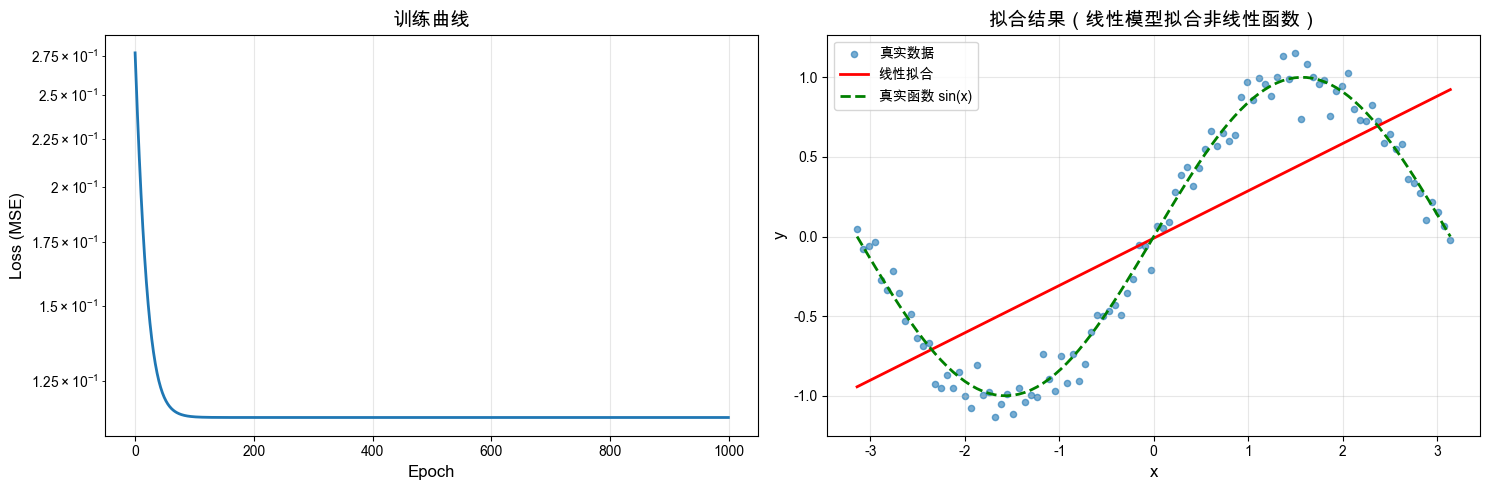


注意: 线性模型无法完美拟合 sin(x)，这说明需要非线性激活函数！


In [11]:
# 可视化训练结果

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 左图：训练曲线
axes[0].plot(losses, linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('训练曲线', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')  # 对数坐标

# 右图：拟合结果
y_pred_final = layer.forward(X_train)

axes[1].scatter(X_train, y_train, alpha=0.6, label='真实数据', s=20)
axes[1].plot(X_train, y_pred_final, 'r-', linewidth=2, label='线性拟合')
axes[1].plot(X_train, np.sin(X_train), 'g--', linewidth=2, label='真实函数 sin(x)')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('拟合结果（线性模型拟合非线性函数）', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n注意: 线性模型无法完美拟合 sin(x)，这说明需要非线性激活函数！")

---

# 🎓 小结与下一步

## ✅ 本教程你学到了什么

1. **矩阵微分基础**
   - 标量对向量/矩阵的导数
   - 梯度的几何意义
   - 常用矩阵求导规则

2. **神经网络梯度计算**
   - 核心公式：$\frac{\partial L}{\partial W} = \delta \mathbf{x}^T$
   - 链式法则的矩阵形式
   - 批量梯度的向量化实现

3. **实践技能**
   - 从零实现线性层的梯度计算
   - 数值梯度检验
   - 完整的训练循环

---

## 🚀 下一步学习

- **06_backpropagation_math.ipynb** - 完整的反向传播算法推导
- **neural_networks/01_perceptron_and_history.ipynb** - 神经网络历史与感知器

---

## 📝 练习题

### 练习 1：手动推导梯度
设 $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$，其中 $A$ 是对称矩阵，求 $\nabla f$。

### 练习 2：实现 ReLU 激活函数的梯度
实现 ReLU 激活函数及其导数，并用数值梯度检验。

### 练习 3：扩展到三层网络
基于 `TwoLayerNetworkWithGradient` 类，实现三层网络的梯度计算。

### 练习 4：实现 Softmax 的梯度
推导并实现 Softmax + 交叉熵损失的梯度（神经网络分类的标准配置）。

---

## 📚 参考资料

- [The Matrix Calculus You Need For Deep Learning](https://explained.ai/matrix-calculus/)
- [CS231n: Backpropagation](http://cs231n.github.io/optimization-2/)
- 《神经网络与深度学习》邱锡鹏 - 第2章

---

**恭喜你完成本教程！🎉**